In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['Ozoney1','Ozoney2','Ozoney3','year', 'month', 'day']]
Y1 = df['Ozone']

In [8]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [9]:
#xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=10)

In [32]:
grad_boost = GradientBoostingRegressor(n_estimators=2000,
                                      max_depth=5,
                                      max_features='log2',
                                      min_samples_split=4,
                                      min_samples_leaf=6,
                                      learning_rate=0.001)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.001, max_depth=5, max_features='log2',
                          min_samples_leaf=6, min_samples_split=4,
                          n_estimators=2000)

In [33]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.8126465707025526

Score on test data: 0.24969567366486134

Root Mean Squared Error: 15.328155151597139

Overall model accuracy: 0.24969567366486134


In [35]:
test=data.loc['207':'259']
X=test[['Ozoney1','Ozoney2','Ozoney3','year', 'month', 'day']]
X

,Ozoney1,Ozoney2,Ozoney3,year,month,day
207,81.874286,23.741429,19.008571,2019,12,29
208,44.231429,24.824286,12.377143,2020,1,5
209,16.544286,33.828571,26.052857,2020,1,12
210,16.497143,30.060000,36.645714,2020,1,19
211,18.280000,31.908701,33.900000,2020,1,26
212,15.304286,14.922727,28.347143,2020,2,2
213,13.075714,42.105714,30.995000,2020,2,9
214,13.350000,47.765714,40.731429,2020,2,16
215,15.944286,32.580000,52.620000,2020,2,23
216,12.685714,34.004286,61.414286,2020,3,1


In [36]:
predict=grad_boost.predict(X)

In [37]:
predict

array([50.1982922 , 32.25618067, 31.75906553, 31.07188904, 31.3997869 ,
       30.00839015, 32.19806786, 31.53814839, 31.30711846, 32.9339316 ,
       32.63101449, 41.0685831 , 49.8312461 , 48.78870781, 45.69452303,
       41.92952089, 39.20809234, 50.55755973, 61.92024092, 51.75675929,
       55.05673293, 44.05602926, 60.46308662, 52.45862304, 34.8252539 ,
       38.02051133, 36.8268255 , 29.35876337, 27.62606905, 30.86308665,
       35.6138862 , 31.5561097 , 26.13055604, 26.92139587, 36.71504974,
       37.80094587, 29.82062489, 31.26443114, 30.67692799, 33.00181421,
       32.75942351, 33.46460672, 35.42917794, 40.07814152, 36.93519086,
       37.02431497, 36.82603382, 40.05993921, 46.08582691, 36.55817103,
       38.00493743, 36.33870115, 44.91043171])

In [38]:
dates=data.loc['207':'259','From Date']

In [39]:
X['From Date']=dates.values

In [40]:
X.columns

Index(['Ozoney1', 'Ozoney2', 'Ozoney3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [41]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [42]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [43]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [44]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

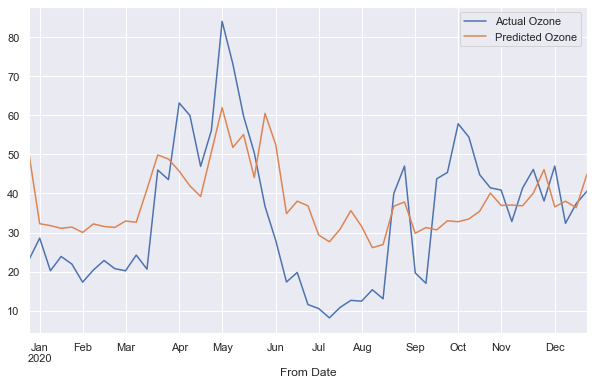

In [45]:
test['Ozone'].plot(legend=True, label='Actual Ozone', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted Ozone')

In [46]:
np.sqrt(mean_squared_error(test['Ozone'],X['pred']))

14.340077534271217

In [47]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 12.768681727545049
MSE: 234.95234035143392
RMSE: 15.328155151597139
R-Squared: 0.24969567366486134


In [48]:
mae = metrics.mean_absolute_error(test['Ozone'],X['pred'])
mse = metrics.mean_squared_error(test['Ozone'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['Ozone'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 12.415339683782813
MSE: 205.63782368891003
RMSE: 14.340077534271217
R-Squared: 0.3288248698143318


In [49]:
import pickle
filename = 'Ozone_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [50]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.24969567366486134


# 3rd plot

In [51]:
testcase = pd.DataFrame()

In [52]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [53]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [54]:
testcase

,test,pred,Corrected
155,81.874286,54.312124,69.640279
156,44.231429,30.368889,45.697044
157,16.544286,33.923778,18.595623
158,16.497143,34.802587,19.474432
159,18.280000,38.135867,22.807712
160,15.304286,26.657672,11.329517
161,13.075714,35.822270,20.494115
162,13.350000,40.705692,25.377537
163,15.944286,33.425969,18.097814
164,12.685714,39.617003,24.288848


In [55]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [56]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.7556437176294575

In [57]:
test2020=pd.DataFrame()

In [58]:
test2020['test']=test['Ozone']
test2020['pred']=X['pred']

In [59]:
test2020.index=test.index

In [60]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

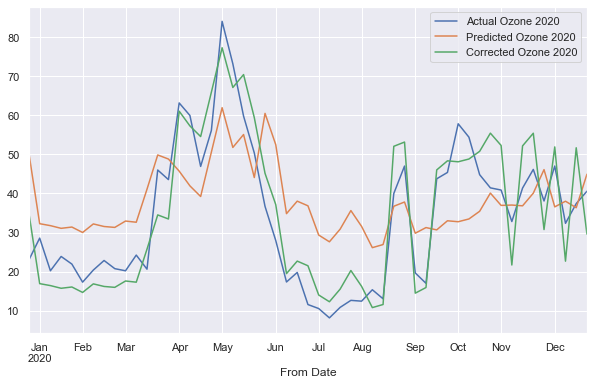

In [61]:
test2020['test'].plot(legend=True, label='Actual Ozone 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted Ozone 2020')
test2020["Corrected"].plot(legend=True, label='Corrected Ozone 2020')

In [62]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.8337599881560697